In [1]:
import unibox as ub
from tr_core.utils.gradio_utils import gradio_caller, gradio_parser

from PIL import Image

logger = ub.UniLogger()

## Minimum Demo(s)

get initial params:

In [2]:
code_str = """from gradio_client import Client

client = Client("https://flag-celebration-manually-pan.trycloudflare.com/")
result = client.predict(
		tags_front="(best quality:1.8)",
		user_input="frederica bernkastel, 1girl",
		tags_back="absurdres, best [quality], 2020s",
		num_images=4,
		seed=-1,
		upscale_prompt=False,
		api_name="/gradio_inference_2"
)
print(result)"""

url, args = gradio_parser(code_str)
display(url, args)

'https://flag-celebration-manually-pan.trycloudflare.com/'

{'tags_front': '(best quality:1.8)',
 'user_input': 'frederica bernkastel, 1girl',
 'tags_back': 'absurdres, best [quality], 2020s',
 'num_images': 4,
 'seed': -1,
 'upscale_prompt': False,
 'api_name': '/gradio_inference_2'}

In [3]:
override_args = {
    'user_input': 'ootori emu, 1girl',
}

gradio_caller(url, args, override_args)

Loaded as API: https://flag-celebration-manually-pan.trycloudflare.com/ ✔


('/tmp/gradio/3d08ed6caeb3603758874d1071e6527d9e9ee81e/image.webp',
 [{'image': '/tmp/gradio/4cdf56445497dce5d45a7df5a021e541734470b8/image.webp',
   'caption': None},
  {'image': '/tmp/gradio/fa28782fd50e0ab9c061dc77c797bc00dcccb2ae/image.webp',
   'caption': None},
  {'image': '/tmp/gradio/2b47b76675cb9779e5fb6f55905d78dbdf79a8ba/image.webp',
   'caption': None},
  {'image': '/tmp/gradio/2691580bcba252deff18d92f1f9cee24f9f74cb8/image.webp',
   'caption': None}],
 '(best quality:1.8), ootori emu, 1girl, absurdres, best [quality], 2020s\nbxl-v5c-cont53/checkpoint-e1_s28000.safetensors  [20240825-022956]')

In [1]:
code_str = """from gradio_client import Client, handle_file

client = Client("https://flag-celebration-manually-pan.trycloudflare.com/")
result = client.predict(
		image=handle_file('https://raw.githubusercontent.com/gradio-app/gradio/main/test/test_files/bus.png'),
		api_name="/demo_remove_exif"
)
print(result)"""

url, args = gradio_parser(code_str)
display(url, args)

file_url = "https://raw.githubusercontent.com/gradio-app/gradio/main/test/test_files/bus.png"
res1 = gradio_caller(url, args, {'image': f"FILE:{file_url}"})

pil_image = ub.loads(file_url)
res2 = gradio_caller(url, args, {'image': pil_image})

display(res1, res2)

NameError: name 'gradio_parser' is not defined

## Continue

In [2]:
import os
import json

def get_gradio_response_node(code_str:str, overrides:str):
    """
    :param overrides: json string
    """
    url, args = gradio_parser(code_str)

    try:
        override_args = json.loads(overrides)
    except json.JSONDecodeError:
        print("Invalid json string")
        override_args = {}

    raw_res = gradio_caller(url, args, override_args)

    if isinstance(raw_res, str) and os.path.isfile(raw_res):
        return ub.loads(raw_res)
    else:
        return raw_res

code_str = """from gradio_client import Client

client = Client("https://flag-celebration-manually-pan.trycloudflare.com/")
result = client.predict(
		character="Hello!!",
		general="Hello!!",
		rating="general",
		batch_size=1,
		api_name="/demo_gpt2_prompt_upscaler"
)
print(result)"""
    
overrides = {'character': "yoisaki kanade", 'general': 'elbow gloves', 'rating': 'explicit'}
overrides_str = json.dumps(overrides)

get_gradio_response_node(code_str, overrides_str)

Loaded as API: https://flag-celebration-manually-pan.trycloudflare.com/ ✔


'yoisaki kanade, 1girl, elbow gloves, headphones, sex toy, blue eyes, vibrator, hairband, silver hair, anal object insertion, open mouth, bare shoulders, from above, checkered floor, black legwear, black gloves, small breasts, sitting, looking up, looking at viewer, cum, very long hair, black thighhighs, vibrator under clothes, black leotard, halterneck, thigh gap, hair between eyes, covered nipples, cameltoe, black footwear, arm support, shiny clothes, buckle, projectdiva, r-18, heavenly ass, long gloves, latex, blue hair, butt plug, knee boots, leotard aside, on floor, pigeon-toed, pussy juice, skin tight'

## testing gradio llm node

Loaded as API: https://moved-involved-yale-checkout.trycloudflare.com/ ✔


([['give me a detailed and unique prompt in danbooru tags format: 1girl, long hair,',
   None]],
 '',
 None)
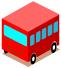

In [7]:
from gradio_client import Client, file, handle_file

client = Client("https://moved-involved-yale-checkout.trycloudflare.com/")

res1 = client.predict(
  text="give me a detailed and unique prompt in danbooru tags format: 1girl, long hair,",
  image=handle_file('https://raw.githubusercontent.com/gradio-app/gradio/main/test/test_files/bus.png'),
  image_process_mode="Default",
  api_name="/add_text_1"
)

res1

In [ ]:
from gradio_client import Client, file, handle_file

client = Client("https://61fd9578add1fc437d.gradio.live/")


In [16]:
fake_handle = {'path': None,
 'meta': {'_type': 'gradio.FileData'},
 'orig_name': None,
 'url': None}


res1 = client.predict(
  text="give me a detailed and unique prompt in danbooru tags format: 1girl, long hair,",
  image=fake_handle,
  image_process_mode="Default",
  api_name="/add_text_1"
)

res1

AppError: The upstream Gradio app has raised an exception but has not enabled verbose error reporting. To enable, set show_error=True in launch().

In [12]:
f1 = handle_file('https://raw.githubusercontent.com/gradio-app/gradio/main/test/test_files/bus.png')
f1

{'path': 'https://raw.githubusercontent.com/gradio-app/gradio/main/test/test_files/bus.png',
 'meta': {'_type': 'gradio.FileData'},
 'orig_name': 'bus.png',
 'url': 'https://raw.githubusercontent.com/gradio-app/gradio/main/test/test_files/bus.png'}

In [9]:
res2 = client.predict(
		model_selector="captioner-1.4-llava-v1.6-llama3.1-CLIP-8b-ft-1",
		temperature=0.2,
		top_p=0.7,
		max_new_tokens=512,
		api_name="/http_bot_2"
)

res2

In [11]:
res3 = client.predict(
  api_name="/clear_history"
)

res3

([], '', None)